In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
vida = pd.read_csv('vidaP.csv')

In [3]:
vida.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [5]:
vida_pivot = vida.pivot_table(values='lifeExp', columns='continent')
print(vida_pivot)

continent    Africa   Americas       Asia     Europe    Oceania
lifeExp    48.86533  64.658737  60.064903  71.903686  74.326208


In [17]:
vida_pivot = vida.pivot_table(index='year', values='lifeExp', columns='country')
print(vida_pivot.iloc[:,0:5])

country  Afghanistan  Albania  Algeria  Angola  Argentina
year                                                     
1952          28.801   55.230   43.077  30.015     62.485
1957          30.332   59.280   45.685  31.999     64.399
1962          31.997   64.820   48.303  34.000     65.142
1967          34.020   66.220   51.407  35.985     65.634
1972          36.088   67.690   54.518  37.928     67.065
1977          38.438   68.930   58.014  39.483     68.481
1982          39.854   70.420   61.368  39.942     69.942
1987          40.822   72.000   65.799  39.906     70.774
1992          41.674   71.581   67.744  40.647     71.868
1997          41.763   72.950   69.152  40.963     73.275
2002          42.129   75.651   70.994  41.003     74.340
2007          43.828   76.423   72.301  42.731     75.320


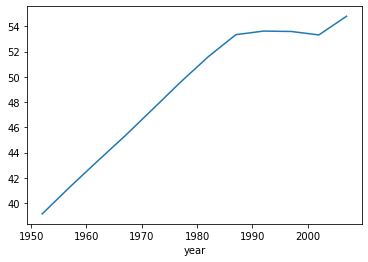

In [8]:
vida_pivot['Africa'].plot()

In [25]:
vida_pivot = vida.pivot_table(index='year', values='lifeExp', columns='continent',
                              aggfunc='min')
print(vida_pivot)

continent  Africa  Americas    Asia  Europe  Oceania
year                                                
1952       30.000    37.579  28.801  43.585   69.120
1957       31.570    40.696  30.332  48.079   70.260
1962       32.767    43.428  31.997  52.098   70.930
1967       34.113    45.032  34.020  54.336   71.100
1972       35.400    46.714  36.088  57.005   71.890
1977       36.788    49.923  31.220  59.507   72.220
1982       38.445    51.461  39.854  61.036   73.840
1987       39.906    53.636  40.822  63.108   74.320
1992       23.599    55.089  41.674  66.146   76.330
1997       36.087    56.671  41.763  68.835   77.550
2002       39.193    58.137  42.129  70.845   79.110
2007       39.613    60.916  43.828  71.777   80.204


In [85]:
vida_pivot = vida.pivot_table(index='year', values='gdpPercap', columns='continent',
                             aggfunc='sum', margins=True)
vida_pivot.style.format("${:,.2f}")

continent,Africa,Americas,Asia,Europe,Oceania,All
year,,,,,,
1952,"$65,133.77","$101,976.56","$171,450.97","$169,831.72","$20,596.17","$528,989.20"
1957,"$72,032.28","$115,401.09","$190,995.19","$208,890.38","$23,197.04","$610,515.98"
1962,"$83,100.10","$122,538.55","$189,069.20","$250,964.60","$25,392.90","$671,065.35"
1967,"$106,618.92","$141,706.34","$197,048.72","$304,314.71","$28,990.04","$778,678.73"
1972,"$121,660.02","$162,283.35","$270,186.47","$374,387.26","$32,834.67","$961,351.76"
1977,"$134,468.80","$183,800.18","$257,113.36","$428,519.37","$34,567.92","$1,038,469.63"
1982,"$129,042.83","$187,668.43","$245,326.46","$468,536.90","$37,109.42","$1,067,684.04"
1987,"$118,698.79","$194,835.01","$251,071.47","$516,429.32","$40,896.08","$1,121,930.67"
1992,"$118,654.14","$201,123.36","$285,109.78","$511,847.04","$41,788.09","$1,158,522.41"


In [123]:
func = lambda df: df*100/df.sum()

vida_pivot = pd.pivot_table(vida,index='year', values='pop', columns='continent',
                            aggfunc='mean')
vida_pivot.apply(func).style.format("%{:,.2f}")

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,%3.84,%4.70,%4.57,%6.76,%5.02
1957,%4.28,%5.26,%5.12,%7.08,%5.61
1962,%4.79,%5.89,%5.56,%7.45,%6.24
1967,%5.42,%6.54,%6.25,%7.78,%6.85
1972,%6.14,%7.20,%7.05,%8.10,%7.56
1977,%7.00,%7.86,%7.82,%8.37,%8.09
1982,%8.07,%8.57,%8.56,%8.60,%8.64
1987,%9.29,%9.29,%9.41,%8.79,%9.19
1992,%10.65,%10.06,%10.27,%9.03,%9.82


In [30]:
vida_pivot = vida.pivot_table(index='year', values='lifeExp', columns='continent',
                              aggfunc=['min','max', 'mean', 'size'] )                                   
print(vida_pivot)

              min                                      max                   \
continent  Africa Americas    Asia  Europe Oceania  Africa Americas    Asia   
year                                                                          
1952       30.000   37.579  28.801  43.585  69.120  52.724   68.750  65.390   
1957       31.570   40.696  30.332  48.079  70.260  58.089   69.960  67.840   
1962       32.767   43.428  31.997  52.098  70.930  60.246   71.300  69.390   
1967       34.113   45.032  34.020  54.336  71.100  61.557   72.130  71.430   
1972       35.400   46.714  36.088  57.005  71.890  64.274   72.880  73.420   
1977       36.788   49.923  31.220  59.507  72.220  67.064   74.210  75.380   
1982       38.445   51.461  39.854  61.036  73.840  69.885   75.760  77.110   
1987       39.906   53.636  40.822  63.108  74.320  71.913   76.860  78.670   
1992       23.599   55.089  41.674  66.146  76.330  73.615   77.950  79.360   
1997       36.087   56.671  41.763  68.835  77.550  

df = pd.read_excel('sales-funnel.xlsx')

table = pd.pivot_table(df, index=['Manager', 'Status'], columns=['Product'], values=['Quantity','Price'],
           aggfunc={'Quantity':len,'Price':[np.sum, np.mean]},fill_value=0)

In [126]:
vida_pivot = vida.pivot_table(index=['year','continent'], values='pop', columns='country', fill_value=0)
print(vida_pivot)

country         Afghanistan  Albania   Algeria    Angola  Argentina  \
year continent                                                        
1952 Africa               0        0   9279525   4232095          0   
     Americas             0        0         0         0   17876956   
     Asia           8425333        0         0         0          0   
     Europe               0  1282697         0         0          0   
     Oceania              0        0         0         0          0   
1957 Africa               0        0  10270856   4561361          0   
     Americas             0        0         0         0   19610538   
     Asia           9240934        0         0         0          0   
     Europe               0  1476505         0         0          0   
     Oceania              0        0         0         0          0   
1962 Africa               0        0  11000948   4826015          0   
     Americas             0        0         0         0   21283783   
     A

In [38]:
vida_pivot = vida.pivot_table(index=['year'], values=['pop','lifeExp'], columns='country')
print(vida_pivot)

            lifeExp                                                      \
country Afghanistan Albania Algeria  Angola Argentina Australia Austria   
year                                                                      
1952         28.801  55.230  43.077  30.015    62.485    69.120  66.800   
1957         30.332  59.280  45.685  31.999    64.399    70.330  67.480   
1962         31.997  64.820  48.303  34.000    65.142    70.930  69.540   
1967         34.020  66.220  51.407  35.985    65.634    71.100  70.140   
1972         36.088  67.690  54.518  37.928    67.065    71.930  70.630   
1977         38.438  68.930  58.014  39.483    68.481    73.490  72.170   
1982         39.854  70.420  61.368  39.942    69.942    74.740  73.180   
1987         40.822  72.000  65.799  39.906    70.774    76.320  74.940   
1992         41.674  71.581  67.744  40.647    71.868    77.560  76.040   
1997         41.763  72.950  69.152  40.963    73.275    78.830  77.510   
2002         42.129  75.6